# Project Proposal

### Introduction
Cardiovascular disease (CVD), including heart disease, is the leading cause of death worldwide. One of the symptoms of heart disease is an irregular heart rate. In this study, we will focus on the differences in heart rate between males and females.

Our dataset originates from a database studying heart disease with 76 attributes, filtered down to 14. The data was compiled in 1988 from four different locations: Cleveland, Hungary, Switzerland, and VA Long Beach. Seeing this dataset, the question we ask is **"Is maximum heart rate affected by/contingent on gender?"** where our null hypothesis is that there is no difference, and the alternative hypothesis is that there is a difference. We will be testing this by observing the difference in the mean maximum heart rate of males and females, so we will only be looking at the two variables sex and maximum heart rate.

### Preliminary Results
Our first job is to import our dataset, tidy it up, and select our variables. Because our dataset is actually split into four different subsets divided by region, we decided to merge them into one big set. The only variables we need would be sex and maximum heart rate, but we decided to keep the region variable just in case we would need to block by them. We also decided to rename the sex categories from 0 and 1 to female and male for better readibility.

In [3]:
library(infer)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
# here we import each regional subset, and make an additional variable of "region"
cl <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE) %>%
    mutate(region = "CL")
hg <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", header = FALSE) %>%
    mutate(region = "HA")
va <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", header = FALSE) %>%
    mutate(region = "VA")
sw <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", header = FALSE) %>%
    mutate(region = "SW")

# here we merge all four subsets together, and select the needed variables, and rename them for readibility
data <- rbind(cl, hg, va, sw) %>%
    select(V2, V8, region) %>%
    rename(sex = V2, max_heart_rate = V8) %>%
    mutate(max_heart_rate = as.numeric(max_heart_rate)) %>%
    filter(!is.na(max_heart_rate))

# we also changed max_heart_rate to be reported in double rather than as char, and filtered out the N/A values

# here we renamed the sex categories from integers to readable text

data$sex[data$sex == 1] <- "Male"
data$sex[data$sex == 0] <- "Female"

# viewing a snippet of our data
head(data)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,sex,max_heart_rate,region
,<chr>,<dbl>,<chr>
1,Male,150,CL
2,Male,108,CL
3,Male,129,CL
4,Male,187,CL
5,Female,172,CL
6,Male,178,CL


After importing, tidying, and selecting only our needed variables, we can go ahead with visualising our data. We can do this via two histograms comparing the maximum heart rate accross the two sexes.

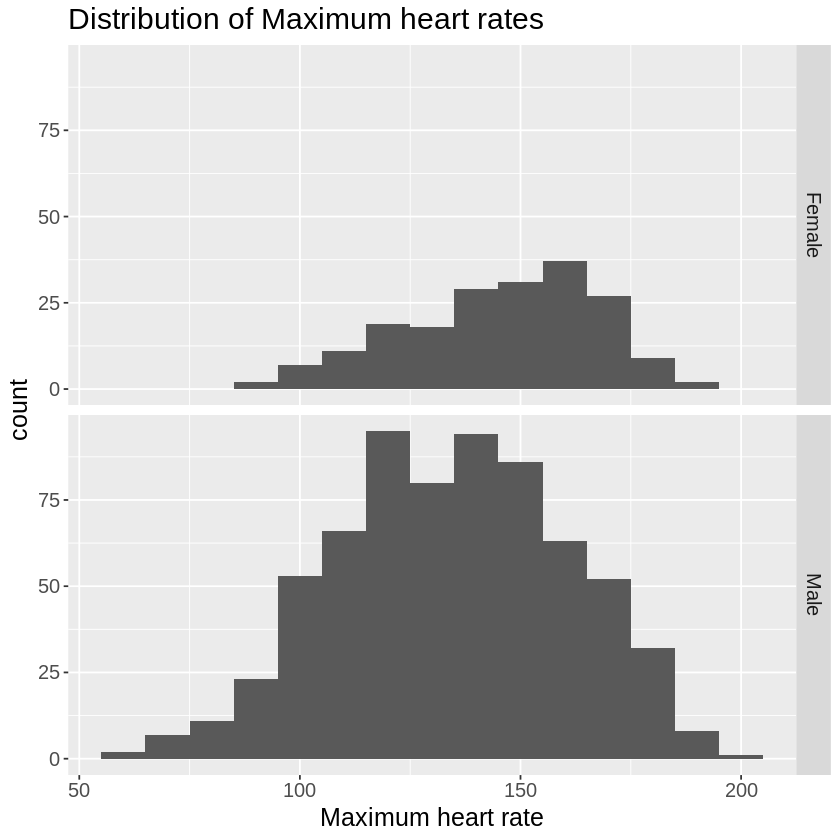

In [6]:
max_heart_rate_plot <- data %>%
                        ggplot() + 
                        geom_histogram(aes(x = max_heart_rate), binwidth = 10) +
                        ggtitle("Distribution of Maximum heart rates") +
                        facet_grid(sex ~ .) +
                        xlab("Maximum heart rate") +
                        theme(text = element_text(size = 15))
max_heart_rate_plot

We can also estimate our parameter by finding the mean of each sex, and then finding the difference between the two means.

In [7]:
p_estim <- data %>%
    group_by(sex) %>%
    summarise(mean = mean(max_heart_rate)) %>%
    pivot_wider(names_from = "sex", values_from = "mean") %>%
    mutate(Diff = abs(Female - Male))

p_estim

Female,Male,Diff
<dbl>,<dbl>,<dbl>
146.2448,135.0639,11.1809


So we've estimated our parameter, the difference in means of max heart rate accross the sexes, as about 11.18 bpm.

### Methods: Planning

The good things about this report is it contains a substantial number of observations for each category we are going to compare, which will allow for a good sample to be drawn independently hence be representative, and therefore produce meaningful results. As the dataset contains observations from 4 geographical locations  we expect the results to be generalizable to the population.

We have to conduct the tests because we dont have access to the whole population. The test statistic is dependent on the sample and different samples provide different values for the test statistic. Therefore, we cannot just compare the test statistic's value (11.18bpm) with the hypothesized value of 0bpm.

Our report will include, amongst other simulations, conducting a hypothesis test to investigate if difference in maximum heart rate achieved exists between genders. In addition we will be computing the corresponding confidence intervals at 90, 95 and 99 percent confidence levels to understand if multiple samples are taken, where majority of the observations will lie in the range of plausible values obtained from the calculation.

**What do you expect to find** - We expect to find that there will be a notable difference in the maximum heart rate achieved between the genders (male ≠ female). According to Prabhavathi et al. (2014), the difference is probably due to the size of the heart, since the smaller female heart, pumping less blood with each beat, needs to beat at a faster rate to match the larger male heart’s output. 

**What impact could such findings have?** - These findings could possibly hint that either gender generally have better cardiac function and survival than the other in the face of cardiac disease. 

**What future questions could this lead to?** - Potential questions that could arise include analyzing if heart rate is more contingent on age in comparison to gender. Specifically, if ageing causes the difference in heart rate between genders to disappear. 


### References
(at least two)